<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [45]:
sum(data['stop_comments'].isnull())

0

In [46]:
data = data[data['stop_comments'].notnull()]

In [47]:
sum(data['stop_comments'].isnull())

0

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [50]:
X_train.shape

(858,)

In [51]:
X_test.shape

(215,)

In [52]:
data['pol_cat'].value_counts()

0    551
1    522
Name: pol_cat, dtype: int64

## **Gonna Apply Logistic Regression**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [56]:
tf_train

<858x2029 sparse matrix of type '<class 'numpy.float64'>'
	with 8107 stored elements in Compressed Sparse Row format>

In [57]:
tf_train.toarray()[0].sum()

1.7120848686988408

In [58]:
#vect?

In [59]:
#vect.get_feature_names()

In [60]:
#X_train[0]

In [61]:
#for i in tf_train.toarray()[0]:
#  if (i != 0):
#    print(i)

In [62]:
tf_train.shape

(858, 2029)

**Print the Vocabulary**

In [63]:
#print(vect.vocabulary_)

In [64]:
#vocab = vect.vocabulary_

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

**Accuracy score on training dataset**

In [66]:
lr.score(tf_train,y_train)

0.9475524475524476

**Accuracy score on test dataset i.e got from the splitting**

In [67]:
lr.score(tf_test,y_test)

0.8186046511627907

**Make predictions on the test dataset i.e. unseen data to the model**

In [68]:
expected = y_test
predicted = lr.predict(tf_test)

**plot confusion matrix for the test dataset**

In [69]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [70]:
pip install mlxtend

[[83  0]
 [ 0  0]]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


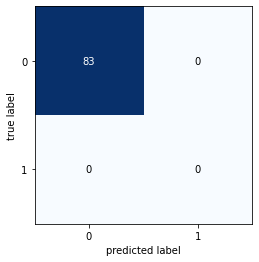

In [71]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [72]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       102
           1       0.90      0.73      0.81       113

    accuracy                           0.82       215
   macro avg       0.83      0.82      0.82       215
weighted avg       0.83      0.82      0.82       215



**find the F1 score**

In [73]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.818211382113821

# **Test the model with the comments of the other video**

In [88]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [89]:
sum(data_test['stop_comments'].isnull())

2

In [90]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [91]:
sum(data_test['stop_comments'].isnull())

0

In [92]:
data_test['pol_cat'].value_counts()

1    695
0    484
Name: pol_cat, dtype: int64

In [132]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_test = vect.fit_transform(data_test['stop_comments'])

In [133]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_test = vect.fit_transform(data_test['stop_comments'])

In [134]:
tf_test

<1179x2327 sparse matrix of type '<class 'numpy.float64'>'
	with 8970 stored elements in Compressed Sparse Row format>

In [135]:
tf_test.toarray()[0].sum()

4.087152849067729

In [136]:
tf_train.toarray().shape

(858, 2029)

In [137]:
tf_test.toarray().shape

(1179, 2327)

In [138]:
diferencia = tf_train.toarray().shape[1] - tf_test.toarray().shape[1]
print(diferencia)
if (diferencia != 0):
  if (diferencia > 0):
    tf_test = tf_test.toarray()

    for i in range(len(tf_test)):
      tf_test.extend(np.zeros(diferencia))

  elif (diferencia < 0):
    tf_test = tf_test.toarray()
    n = tf_test.shape[1]
    limite = n+diferencia
    print(limite)
    tf_test = tf_test[:,0:limite]

tf_test.shape

-298
2029


(1179, 2029)

In [139]:
lr.score(tf_test, data_test['pol_cat'])

0.42408821034775235